<a href="https://colab.research.google.com/github/piyush1856/machine-learning-algorithms/blob/main/10_decision_tree_%26_ensemble_techniques/decision_tree_class_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Class - 1**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io

In [ ]:
!gdown 16KtxSt_QEGQvfluEaMls5cCHPwhRXgCk

Downloading...
From: https://drive.google.com/uc?id=16KtxSt_QEGQvfluEaMls5cCHPwhRXgCk
To: /content/HR-Employee-Attrition.csv
100% 228k/228k [00:00<00:00, 54.2MB/s]


In [ ]:
df = pd.read_csv("HR-Employee-Attrition.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
!gdown 19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
!gdown 1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
!gdown 1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
!gdown 12Bh2AN8LcZAlg20ehpQrEWccUDaSdsOG

Downloading...
From: https://drive.google.com/uc?id=19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
To: /content/preprocessed_X_sm.pickle
100% 534k/534k [00:00<00:00, 93.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
To: /content/X_test.pickle
100% 111k/111k [00:00<00:00, 49.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
To: /content/y_sm.pickle
100% 15.4k/15.4k [00:00<00:00, 30.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=12Bh2AN8LcZAlg20ehpQrEWccUDaSdsOG
To: /content/y_test.pickle
100% 9.49k/9.49k [00:00<00:00, 21.1MB/s]


In [ ]:
# import pickle
# Load data (deserialize)
with open('preprocessed_X_sm.pickle', 'rb') as handle:
    # X_train = pickle.load(handle)
    X_train = pd.read_pickle("preprocessed_X_sm.pickle")

with open('X_test.pickle', 'rb') as handle:
    # X_test = pickle.load(handle)
    X_test = pd.read_pickle("X_test.pickle")


with open('y_sm.pickle', 'rb') as handle:
    # y_train = pickle.load(handle)
    y_train = pd.read_pickle("y_sm.pickle")


with open('y_test.pickle', 'rb') as handle:
    # y_test = pickle.load(handle)
    y_test = pd.read_pickle("y_test.pickle")

In [ ]:
X_train.shape, X_test.shape

((1848, 36), (368, 36))

In [ ]:
X_train.head()

,Age,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,36,1174,3,4,0.233871,1,0,99,3,2,...,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,21,546,5,1,0.127479,3,1,97,3,1,...,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,43,422,1,3,0.151584,4,0,33,3,2,...,2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,42,188,29,3,0.127479,2,1,56,1,2,...,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,35,992,1,3,0.127479,4,1,68,2,1,...,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
y_train.value_counts()

,count
Attrition,
0,924
1,924


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion="entropy")

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
model.score(X_test, y_test)

0.7717391304347826

In [ ]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
model_lr.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6902173913043478

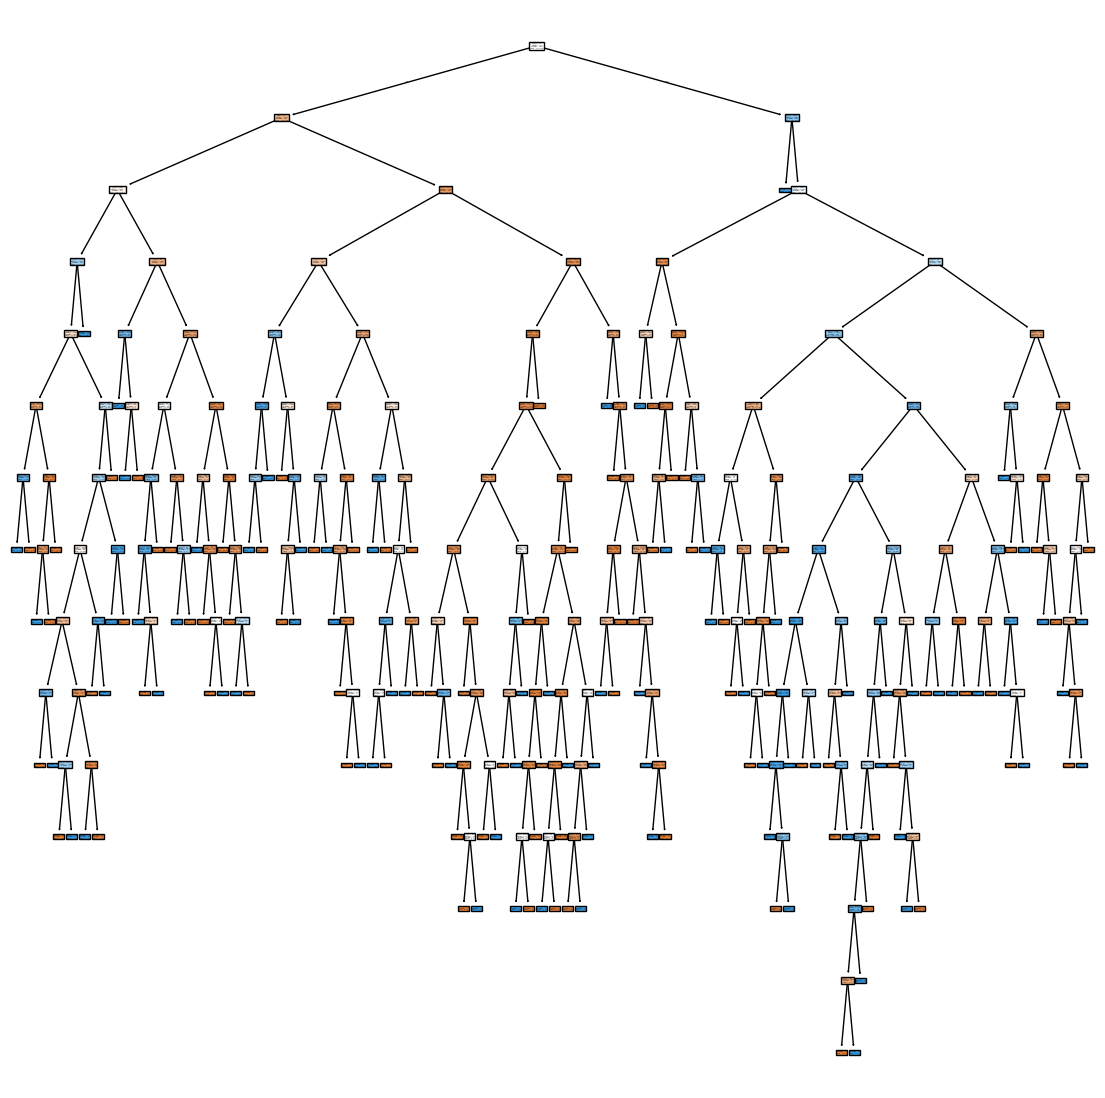

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(14,14))
plot_tree(model, filled = True);

# **Class - 2**

In [ ]:
import pandas as pd
import numpy as np

!gdown 19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
!gdown 1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
!gdown 1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
!gdown 12Bh2AN8LcZAlg20ehpQrEWccUDaSdsOG

Downloading...
From: https://drive.google.com/uc?id=19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
To: /content/preprocessed_X_sm.pickle
100% 534k/534k [00:00<00:00, 76.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
To: /content/X_test.pickle
100% 111k/111k [00:00<00:00, 72.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
To: /content/y_sm.pickle
100% 15.4k/15.4k [00:00<00:00, 29.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=12Bh2AN8LcZAlg20ehpQrEWccUDaSdsOG
To: /content/y_test.pickle
100% 9.49k/9.49k [00:00<00:00, 28.8MB/s]


In [ ]:
# import pickle
# Load data (deserialize)
with open('preprocessed_X_sm.pickle', 'rb') as handle:
    # X_train = pickle.load(handle)
    X_train = pd.read_pickle("preprocessed_X_sm.pickle")

with open('X_test.pickle', 'rb') as handle:
    # X_test = pickle.load(handle)
    X_test = pd.read_pickle("X_test.pickle")


with open('y_sm.pickle', 'rb') as handle:
    # y_train = pickle.load(handle)
    y_train = pd.read_pickle("y_sm.pickle")


with open('y_test.pickle', 'rb') as handle:
    # y_test = pickle.load(handle)
    y_test = pd.read_pickle("y_test.pickle")

In [ ]:
y_train.value_counts()

,count
Attrition,
0,924
1,924


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_validate, cross_val_score

In [ ]:
kfold = KFold(n_splits=10)

depths = [3, 4, 5, 6, 7, 9, 11, 13, 15, 50]

for depth in depths:
    tree_clf = DecisionTreeClassifier(random_state=7, max_depth=depth)

    cv_acc_results = cross_validate(tree_clf, X_train, y_train, cv = kfold, scoring = 'accuracy', return_train_score = True)

    print(f"K-Fold for depth:{depth} Accuracy Mean: Train: {cv_acc_results['train_score'].mean()*100} Validation: {cv_acc_results['test_score'].mean()*100}")
    print(f"K-Fold for depth: {depth} Accuracy Std: Train: {cv_acc_results['train_score'].std()*100} Validation: {cv_acc_results['test_score'].std()*100}")
    print('***************')

K-Fold for depth:3 Accuracy Mean: Train: 78.23483177413387 Validation: 76.47326674500587
K-Fold for depth: 3 Accuracy Std: Train: 1.203088267164511 Validation: 11.331241420327677
***************
K-Fold for depth:4 Accuracy Mean: Train: 83.50772540936214 Validation: 80.58049353701529
K-Fold for depth: 4 Accuracy Std: Train: 0.7889219949763586 Validation: 6.337951865133366
***************
K-Fold for depth:5 Accuracy Mean: Train: 87.36180052847033 Validation: 81.88366627497062
K-Fold for depth: 5 Accuracy Std: Train: 0.7888615077334944 Validation: 7.73770036081666
***************
K-Fold for depth:6 Accuracy Mean: Train: 90.51833384407234 Validation: 84.58783783783784
K-Fold for depth: 6 Accuracy Std: Train: 0.9528667083694777 Validation: 7.804013667897827
***************
K-Fold for depth:7 Accuracy Mean: Train: 93.24203753064435 Validation: 84.20945945945945
K-Fold for depth: 7 Accuracy Std: Train: 0.8887486809601636 Validation: 8.453236055736403
***************
K-Fold for depth:9 Accurac

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=7, max_depth=6)
tree_clf=tree_clf.fit(X_train, y_train)
pred = tree_clf.predict(X_test)

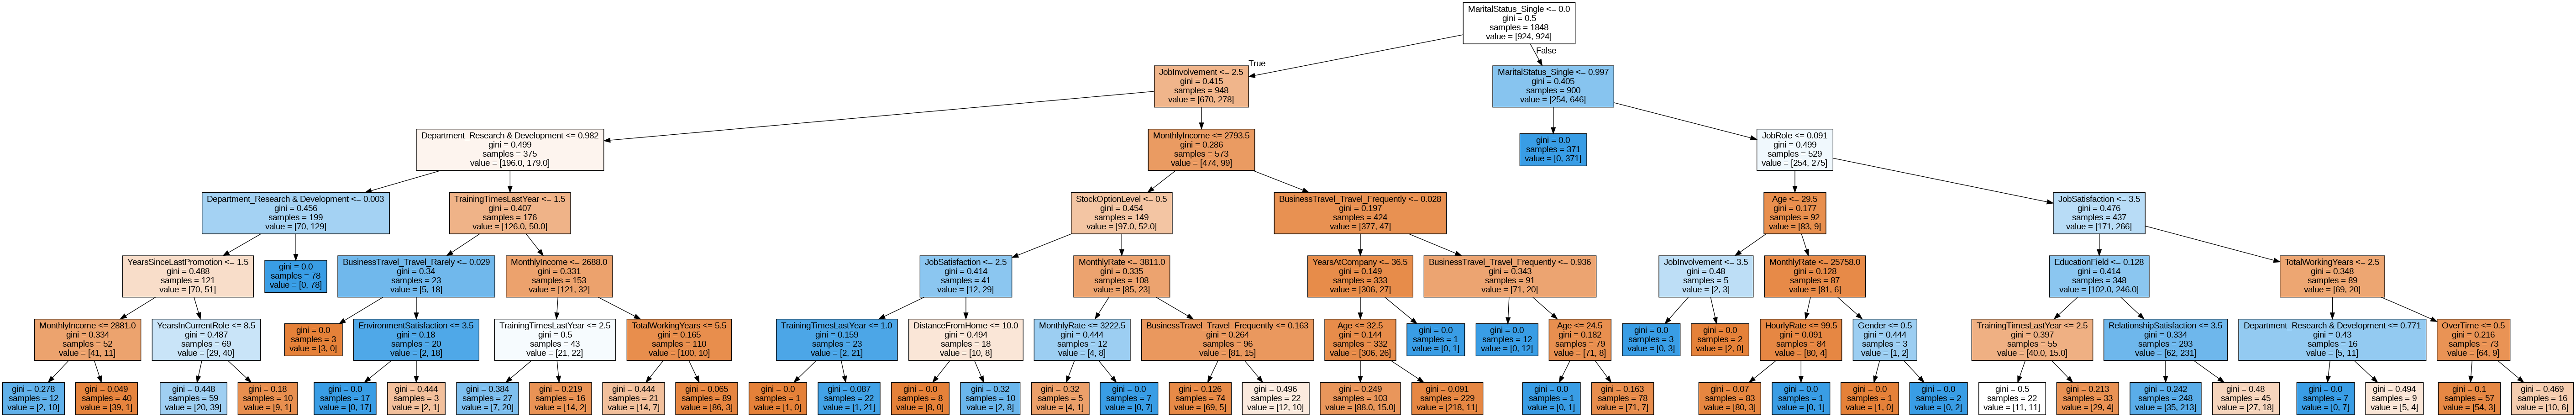

In [ ]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(X_train.columns)

# Ensure the target variable 'Attrition' is not there in the feature list

dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [ ]:
tree_clf.score(X_test, y_test)

0.8125

In [ ]:
tree_clf.score(X_train, y_train)

0.9025974025974026

Text(0.5, 23.52222222222222, 'Predicted label')

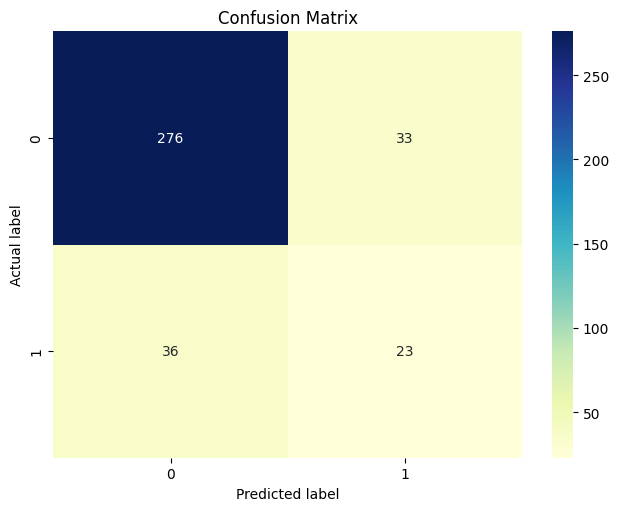

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cnf_matrix = confusion_matrix(y_test, pred)
fig, ax = plt.subplots()

#### create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

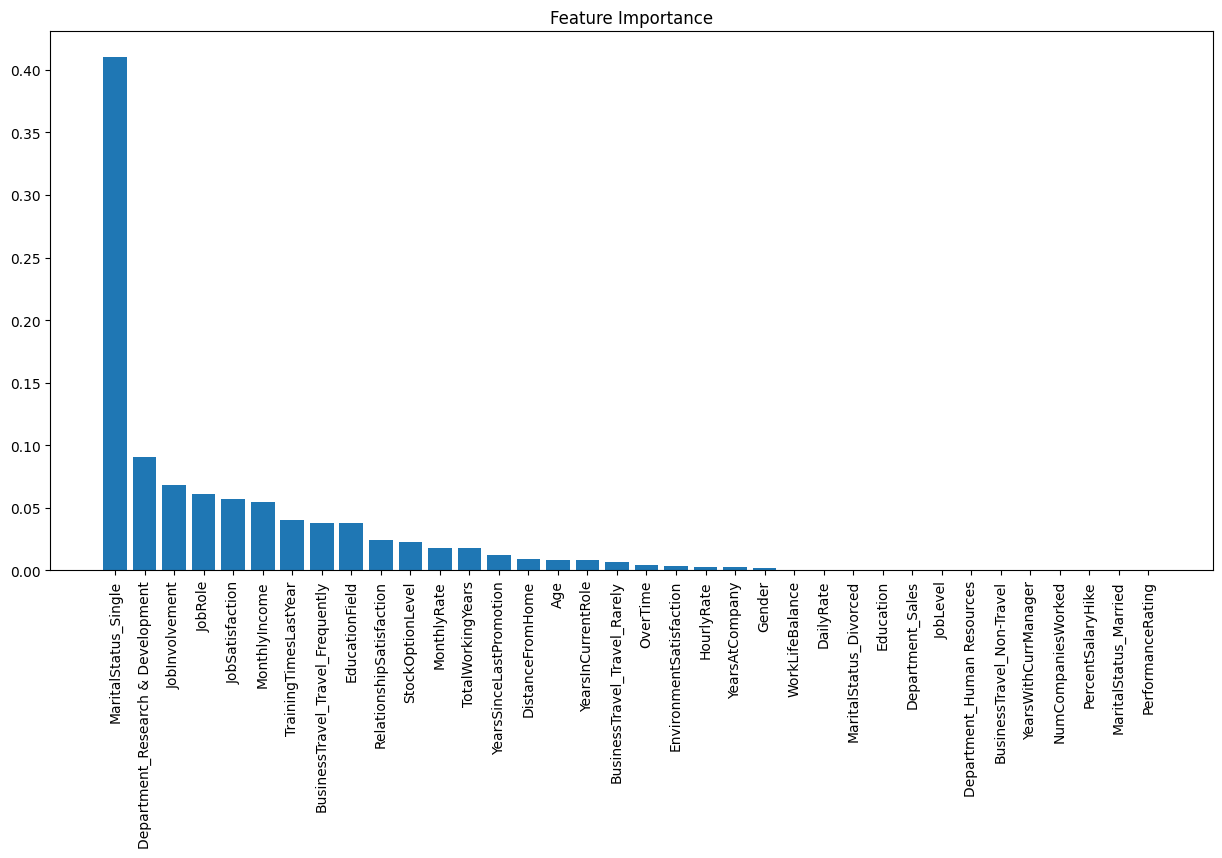

In [ ]:
importances = tree_clf.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances

plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

In [ ]:
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(len(list(X_train.columns))):
    feat = X_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

,Feature,Coefficient
0,MaritalStatus_Single,0.410260
1,Department_Research & Development,0.090586
2,JobInvolvement,0.068307
3,JobRole,0.060964
4,JobSatisfaction,0.057460
5,MonthlyIncome,0.054575
6,TrainingTimesLastYear,0.040416
7,BusinessTravel_Travel_Frequently,0.037893
8,EducationField,0.037847
9,RelationshipSatisfaction,0.024650


## **Regression with DT**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_validate
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

!gdown 176WcJFfaSz3YkO1TiGEg_EqWgJ4YQEwO

Downloading...
From: https://drive.google.com/uc?id=176WcJFfaSz3YkO1TiGEg_EqWgJ4YQEwO
To: /content/regData.csv
100% 13.4k/13.4k [00:00<00:00, 24.8MB/s]


In [ ]:
regression_data = pd.read_csv('regData.csv')

regression_data.head()

,X,Y
0,1,1.018138
1,2,0.813685
2,3,0.795484
3,4,0.860005
4,5,0.990648


In [ ]:
regression_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       600 non-null    int64  
 1   Y       600 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 9.5 KB


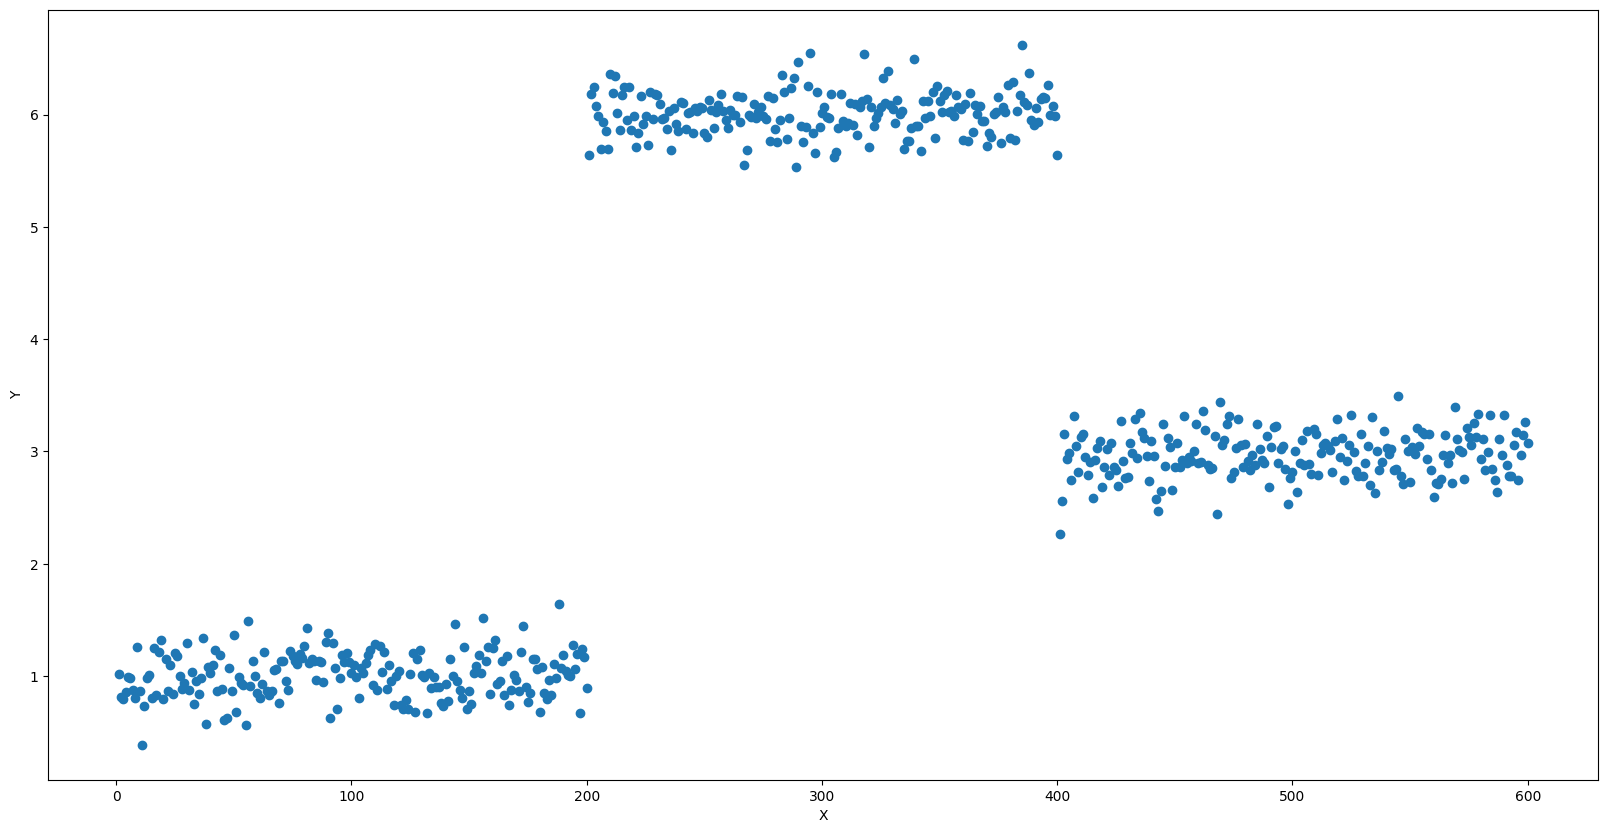

In [ ]:
X = regression_data['X']
y = regression_data['Y']

#### Plotting data

plt.figure(figsize = (20,10))
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=43,
                                                    shuffle = True)

X_train = X_train.values.reshape(-1,1)

y_train = y_train.values

depths = [1,2,3,5,6,7,9,11]

for depth in depths:
    tree_reg = DecisionTreeRegressor(random_state=7, max_depth = depth, min_samples_split = 10, min_samples_leaf = 20)

    kfold = KFold(n_splits=3)
    # scoring is taken as negative mse as we maximize the scoring. maximizing negative MSE is same as minimizing MSE.
    cv_acc_results = cross_validate(tree_reg, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error', return_train_score = True)

    print(f"K-Fold for depth:{depth} -ve MSE Mean: Train: {cv_acc_results['train_score'].mean()*100} Validation: {cv_acc_results['test_score'].mean()*100}")
    print('***************')

K-Fold for depth:1 -ve MSE Mean: Train: -157.29484407813618 Validation: -161.85220982964185
***************
K-Fold for depth:2 -ve MSE Mean: Train: -4.022779524301007 Validation: -13.41631105078697
***************
K-Fold for depth:3 -ve MSE Mean: Train: -3.889896491712604 Validation: -13.530023054703413
***************
K-Fold for depth:5 -ve MSE Mean: Train: -3.802910351858201 Validation: -13.515703625248829
***************
K-Fold for depth:6 -ve MSE Mean: Train: -3.802910351858201 Validation: -13.515703625248829
***************
K-Fold for depth:7 -ve MSE Mean: Train: -3.802910351858201 Validation: -13.515703625248829
***************
K-Fold for depth:9 -ve MSE Mean: Train: -3.802910351858201 Validation: -13.515703625248829
***************
K-Fold for depth:11 -ve MSE Mean: Train: -3.802910351858201 Validation: -13.515703625248829
***************


In [ ]:
features = list(regression_data.columns[0])

tree_reg = DecisionTreeRegressor(random_state=7, max_depth = 2, min_samples_split = 20 )
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, min_samples_split=20, random_state=7)

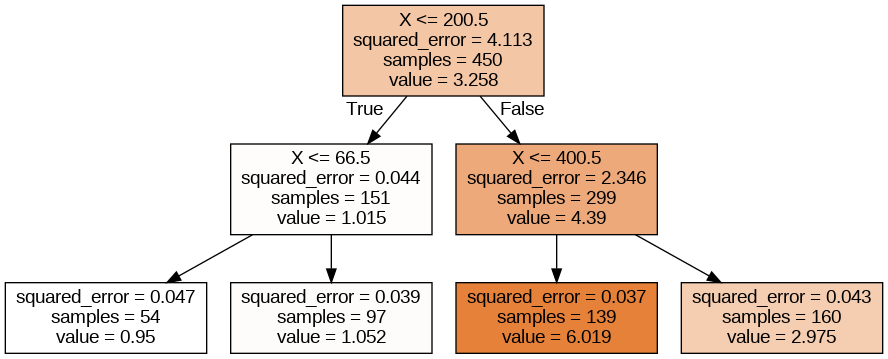

In [ ]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

dot_data = StringIO()
export_graphviz(tree_reg, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

<ipython-input-33-4b88f8896680>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X_train), max(X_train), 0.01)


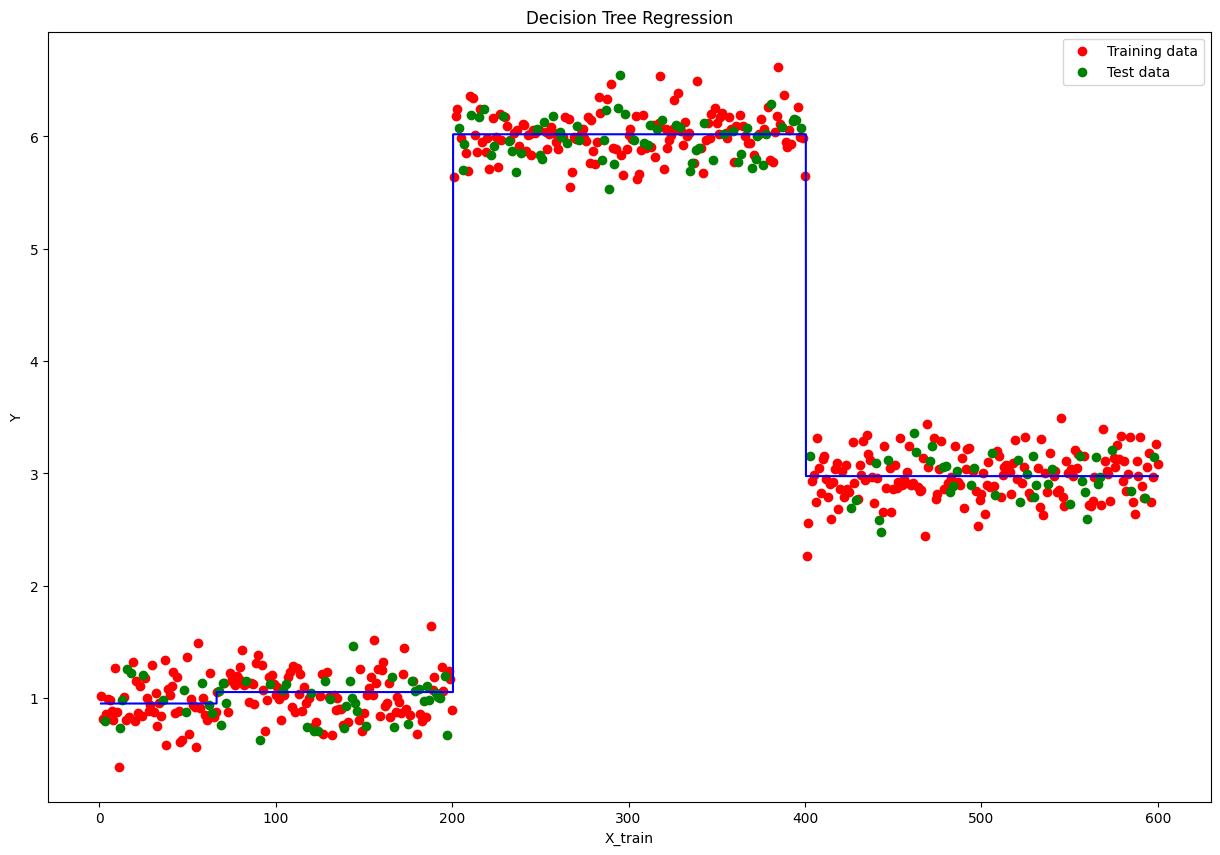

In [ ]:
X_grid = np.arange(min(X_train), max(X_train), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.figure(figsize = (15,10))
plt.scatter(X_train, y_train, color = 'red', label = 'Training data')
plt.scatter (X_test, y_test, color = 'green', label = 'Test data')
plt.plot(X_grid, tree_reg.predict(X_grid), color = 'blue')
plt.title('Decision Tree Regression')
plt.xlabel('X_train')
plt.ylabel('Y')
plt.legend()
plt.show()

# **Bagging and Random Forest**

In [ ]:
import pandas as pd
import numpy as np

!gdown 16KtxSt_QEGQvfluEaMls5cCHPwhRXgCk
!gdown 19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
!gdown 1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
!gdown 1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
!gdown 12Bh2AN8LcZAlg20ehpQrEWccUDaSdsOG

Downloading...
From: https://drive.google.com/uc?id=16KtxSt_QEGQvfluEaMls5cCHPwhRXgCk
To: /content/HR-Employee-Attrition.csv
100% 228k/228k [00:00<00:00, 68.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
To: /content/preprocessed_X_sm.pickle
100% 534k/534k [00:00<00:00, 51.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
To: /content/X_test.pickle
100% 111k/111k [00:00<00:00, 58.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
To: /content/y_sm.pickle
100% 15.4k/15.4k [00:00<00:00, 26.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=12Bh2AN8LcZAlg20ehpQrEWccUDaSdsOG
To: /content/y_test.pickle
100% 9.49k/9.49k [00:00<00:00, 26.7MB/s]


In [ ]:
# import pickle
# Load data (deserialize)
with open('preprocessed_X_sm.pickle', 'rb') as handle:
    # X_train = pickle.load(handle)
    X_train = pd.read_pickle("preprocessed_X_sm.pickle")

with open('X_test.pickle', 'rb') as handle:
    # X_test = pickle.load(handle)
    X_test = pd.read_pickle("X_test.pickle")


with open('y_sm.pickle', 'rb') as handle:
    # y_train = pickle.load(handle)
    y_train = pd.read_pickle("y_sm.pickle")


with open('y_test.pickle', 'rb') as handle:
    # y_test = pickle.load(handle)
    y_test = pd.read_pickle("y_test.pickle")


### **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=7, max_depth=4)
tree_clf.fit(X_train, y_train)

print("Train accuracy: {:.2f}".format(tree_clf.score(X_train, y_train)*100))
print("Test accuracy: {:.2f}".format(tree_clf.score(X_test, y_test)*100))

Train accuracy: 83.77
Test accuracy: 78.80


### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=18, max_depth=5, n_estimators=101)

In [ ]:
from sklearn.model_selection import KFold, cross_validate

kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(rf_clf, X_train, y_train, cv=kfold, scoring='accuracy', return_train_score=True)

print(f"K-Fold Accuracy Mean: \n Train: {cv_acc_results['train_score'].mean()*100:.2f} \n Validation: {cv_acc_results['test_score'].mean()*100:.2f}")
print(f"K-Fold Accuracy Std: \n Train: {cv_acc_results['train_score'].std()*100:.2f}, \n Validation: {cv_acc_results['test_score'].std()*100:.2f}")

K-Fold Accuracy Mean: 
 Train: 91.30 
 Validation: 85.94
K-Fold Accuracy Std: 
 Train: 0.64, 
 Validation: 5.91


In [ ]:
rf_clf.fit(X_train, y_train)

print("Train accuracy: {:.2f}".format(rf_clf.score(X_train, y_train)*100))
print("Test accuracy: {:.2f}".format(rf_clf.score(X_test, y_test)*100))

Train accuracy: 90.85
Test accuracy: 83.70


In [ ]:
# Defining parameters -

params = {
          'n_estimators' : [100,200,300,400],
          'max_depth' : [3,5,10],
          'criterion' : ['gini', 'entropy'],
          'bootstrap' : [True, False],
          'max_features' : [8,9,10]
         }

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator = RandomForestClassifier(),
                    param_grid = params,
                    scoring = 'accuracy',
                    cv = 3,
                    n_jobs=-1
                    )

grid.fit(X_train, y_train)

print("Best params: ", grid.best_params_)
print("Best score: ", grid.best_score_)

Best params:  {'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'max_features': 10, 'n_estimators': 200}
Best score:  0.9015151515151515


In [ ]:
clf2 = RandomForestClassifier(random_state=7, bootstrap=False, criterion='gini',
                              max_depth=10, max_features=8, n_estimators=200)

kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(clf2, X_train, y_train, cv=kfold, scoring='accuracy', return_train_score=True)

print(f"K-Fold Accuracy Mean: \n Train: {cv_acc_results['train_score'].mean()*100:.3f} \n Validation: {cv_acc_results['test_score'].mean()*100:.3f}")
print(f"K-Fold Accuracy Std: \n Train: {cv_acc_results['train_score'].std()*100:.3f}, \n Validation: {cv_acc_results['test_score'].std()*100:.3f}")

K-Fold Accuracy Mean: 
 Train: 99.657 
 Validation: 91.999
K-Fold Accuracy Std: 
 Train: 0.085, 
 Validation: 6.801


In [ ]:

# Defining parameters -

from scipy.stats import uniform

params = {'ccp_alpha': uniform(loc=0, scale=0.4)}
# sample from uniform dist between 0 to 0.4

from sklearn.model_selection import RandomizedSearchCV

random = RandomizedSearchCV(estimator = RandomForestClassifier(random_state=7, bootstrap=False, criterion='gini',
                                                               max_depth=10, max_features=8, n_estimators=200),
                            param_distributions = params,
                            scoring = 'accuracy',
                            cv = 3,
                            n_iter=15,
                            n_jobs=-1
                            )

random.fit(X_train, y_train)

print("Best param: ", random.best_params_)
print("Best score: ", random.best_score_)

Best param:  {'ccp_alpha': 0.053489616939901556}
Best score:  0.7278138528138528


# **Boosting - 1 : GBDT**

In [ ]:
!gdown 19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
!gdown 1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
!gdown 1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
!gdown 12Bh2AN8LcZAlg20ehpQrEWccUDaSdsOG

Downloading...
From: https://drive.google.com/uc?id=19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
To: /content/preprocessed_X_sm.pickle
100% 534k/534k [00:00<00:00, 10.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
To: /content/X_test.pickle
100% 111k/111k [00:00<00:00, 5.81MB/s]
Downloading...
From: https://drive.google.com/uc?id=1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
To: /content/y_sm.pickle
100% 15.4k/15.4k [00:00<00:00, 30.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=12Bh2AN8LcZAlg20ehpQrEWccUDaSdsOG
To: /content/y_test.pickle
100% 9.49k/9.49k [00:00<00:00, 21.1MB/s]


In [ ]:
# import pickle
# Load data (deserialize)
import pandas as pd
with open('preprocessed_X_sm.pickle', 'rb') as handle:
    # X_train = pickle.load(handle)
    X_train = pd.read_pickle("preprocessed_X_sm.pickle")

with open('X_test.pickle', 'rb') as handle:
    # X_test = pickle.load(handle)
    X_test = pd.read_pickle("X_test.pickle")


with open('y_sm.pickle', 'rb') as handle:
    # y_train = pickle.load(handle)
    y_train = pd.read_pickle("y_sm.pickle")


with open('y_test.pickle', 'rb') as handle:
    # y_test = pickle.load(handle)
    y_test = pd.read_pickle("y_test.pickle")

In [ ]:
X_train.head()

,Age,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,36,1174,3,4,0.233871,1,0,99,3,2,...,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,21,546,5,1,0.127479,3,1,97,3,1,...,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,43,422,1,3,0.151584,4,0,33,3,2,...,2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,42,188,29,3,0.127479,2,1,56,1,2,...,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,35,992,1,3,0.127479,4,1,68,2,1,...,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
y_train.head()

,Attrition
0,0
1,0
2,0
3,0
4,0


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=150, max_depth=2, loss="log_loss")

gbc.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=2, n_estimators=150)

In [ ]:
gbc.score(X_train, y_train)

0.948051948051948

In [ ]:
gbc.score(X_test, y_test)

0.8804347826086957

# **Boosting - 2**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn

In [ ]:
import pickle

!gdown 171Yoe_GSapyrmOnD9oBzHWNOD_OnQs0F
!gdown 1hnIlTPW3AMeB69EbeaXCRIrpMVT1Vwmc
!gdown 1nZtB_RtxMg_MgoRczb8UWQX-AEK_l3qE
!gdown 1zLDUErwKdmF-RacOyHEuI_z_46LssQtP


with open('X_train.pickle', 'rb') as handle:
    X_train = pickle.load(handle)

with open('X_test.pickle', 'rb') as handle:
    X_test = pickle.load(handle)

with open('Y_train.pickle', 'rb') as handle:
    y_train = pickle.load(handle)

with open('Y_test.pickle', 'rb') as handle:
    y_test = pickle.load(handle)

Downloading...
From: https://drive.google.com/uc?id=171Yoe_GSapyrmOnD9oBzHWNOD_OnQs0F
To: /content/Y_test.pickle
100% 31.7k/31.7k [00:00<00:00, 44.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1hnIlTPW3AMeB69EbeaXCRIrpMVT1Vwmc
To: /content/X_test.pickle
100% 253k/253k [00:00<00:00, 28.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1nZtB_RtxMg_MgoRczb8UWQX-AEK_l3qE
To: /content/Y_train.pickle
100% 126k/126k [00:00<00:00, 37.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1zLDUErwKdmF-RacOyHEuI_z_46LssQtP
To: /content/X_train.pickle
100% 1.01M/1.01M [00:00<00:00, 52.1MB/s]


In [ ]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn import tree
from sklearn.model_selection import GridSearchCV

params = {
    "max_depth" : [3, 5, 7, 10, 15],
    "max_leaf_nodes" : [20, 40, 60]
}

model1 = DTC()
clf = GridSearchCV(model1, params, scoring = "accuracy", cv=5)

clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, 10, 15],
                         'max_leaf_nodes': [20, 40, 60]},
             scoring='accuracy')

In [ ]:
res = clf.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")


Parameters:{'max_depth': 3, 'max_leaf_nodes': 20} Mean_score: 0.34208509132931136 Rank: 13
Parameters:{'max_depth': 3, 'max_leaf_nodes': 40} Mean_score: 0.34208509132931136 Rank: 13
Parameters:{'max_depth': 3, 'max_leaf_nodes': 60} Mean_score: 0.34208509132931136 Rank: 13
Parameters:{'max_depth': 5, 'max_leaf_nodes': 20} Mean_score: 0.4465364487646616 Rank: 12
Parameters:{'max_depth': 5, 'max_leaf_nodes': 40} Mean_score: 0.44672668338736293 Rank: 10
Parameters:{'max_depth': 5, 'max_leaf_nodes': 60} Mean_score: 0.44666327184646243 Rank: 11
Parameters:{'max_depth': 7, 'max_leaf_nodes': 20} Mean_score: 0.6327369873102506 Rank: 9
Parameters:{'max_depth': 7, 'max_leaf_nodes': 40} Mean_score: 0.6348298899438709 Rank: 8
Parameters:{'max_depth': 7, 'max_leaf_nodes': 60} Mean_score: 0.635083616553449 Rank: 7
Parameters:{'max_depth': 10, 'max_leaf_nodes': 20} Mean_score: 0.6976794754761447 Rank: 5
Parameters:{'max_depth': 10, 'max_leaf_nodes': 40} Mean_score: 0.773402086487067 Rank: 4
Parameters

In [ ]:
print(clf.best_estimator_)

DecisionTreeClassifier(max_depth=15, max_leaf_nodes=60)


In [ ]:
clf

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, 10, 15],
                         'max_leaf_nodes': [20, 40, 60]},
             scoring='accuracy')

In [ ]:
clf = DTC(**clf.best_params_)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, max_leaf_nodes=60)

In [ ]:
clf.score(X_train, y_train)

0.8223617453069508

In [ ]:
clf.score(X_test, y_test)

0.8125792543748415

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV
import datetime as dt

params = {
    "n_estimators": [10,25,50,100,150,200],
    "max_depth" : [3, 5, 10, 15, 20],
    "max_leaf_nodes" : [20, 40, 80]
}

rfc = RFC(n_jobs = -1)
clf = RandomizedSearchCV(rfc, params, scoring = "accuracy", cv=3, n_jobs = -1, verbose = 1)

start = dt.datetime.now()
clf.fit(X_train, y_train)
end = dt.datetime.now()

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
res = clf.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")

Parameters:{'n_estimators': 200, 'max_leaf_nodes': 20, 'max_depth': 20} Mean_score: 0.8033358701166922 Rank: 5
Parameters:{'n_estimators': 100, 'max_leaf_nodes': 80, 'max_depth': 15} Mean_score: 0.8899036022323693 Rank: 2
Parameters:{'n_estimators': 50, 'max_leaf_nodes': 40, 'max_depth': 5} Mean_score: 0.7709284627092847 Rank: 9
Parameters:{'n_estimators': 150, 'max_leaf_nodes': 80, 'max_depth': 15} Mean_score: 0.8902841197361745 Rank: 1
Parameters:{'n_estimators': 10, 'max_leaf_nodes': 20, 'max_depth': 3} Mean_score: 0.5124302384576357 Rank: 10
Parameters:{'n_estimators': 50, 'max_leaf_nodes': 20, 'max_depth': 15} Mean_score: 0.8044774226281076 Rank: 4
Parameters:{'n_estimators': 150, 'max_leaf_nodes': 40, 'max_depth': 5} Mean_score: 0.7736555048198884 Rank: 8
Parameters:{'n_estimators': 50, 'max_leaf_nodes': 40, 'max_depth': 15} Mean_score: 0.8513444951801117 Rank: 3
Parameters:{'n_estimators': 50, 'max_leaf_nodes': 20, 'max_depth': 20} Mean_score: 0.7935692541856926 Rank: 6
Paramete

In [ ]:
print(f"Time taken for fits : {end - start}")

Time taken for fits : 0:01:08.481544


In [ ]:
print(clf.best_estimator_)

RandomForestClassifier(max_depth=15, max_leaf_nodes=80, n_estimators=150,
                       n_jobs=-1)


In [ ]:
rf = clf.best_estimator_
rf.fit(X_train, y_train)
print("Model acc",rf.score(X_test, y_test))

Model acc 0.8911995942176009


In [ ]:
params = {
    "n_estimators": [50,100,150,200],
    "max_depth" : [3, 4, 5, 7],
    "max_leaf_nodes" : [20, 40, 80],
    "learning_rate": [0.1, 0.2, 0.3]
}

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.model_selection import RandomizedSearchCV
import datetime as dt


gbc = GBC()
clf = RandomizedSearchCV(gbc, params, scoring = "accuracy", cv=3, n_jobs = -1, verbose = 1)

start = dt.datetime.now()

clf.fit(X_train, y_train)

end = dt.datetime.now()

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
print(f"Time taken for fits : {end - start}")

Time taken for fits : 1:18:35.616132


In [ ]:
print(clf.best_estimator_)

GradientBoostingClassifier(max_depth=7, max_leaf_nodes=20, n_estimators=200)


In [ ]:
gbc = clf.best_estimator_
gbc.fit(X_train, y_train)
print("Model acc",gbc.score(X_test, y_test))

Model acc 0.9695663200608674


In [ ]:
print(f"Time taken for fits : {end - start}")


Time taken for fits : 1:18:35.616132


# **Other Ensemble Techniques**

In [1]:
!pip install scikit-learn==1.5.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 77.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0


In [2]:
# Write a function named 'format_number' that takes a non-negative number as its only parameter.
# Your function should convert the number to a string and add commas as a thousand separators.
# For example, calling format_number(1000000) should return "1,000,000".

In [3]:
def format_number(num):
  temp = str(num)
  cnt = 1
  res = ""
  for i in temp[::-1]:
    res += i
    if cnt == 3:
      res += ","
      cnt = 0
    cnt += 1
  return res[::-1]


format_number(1000000)

'1,000,000'

In [4]:
import pickle

!gdown 171Yoe_GSapyrmOnD9oBzHWNOD_OnQs0F
!gdown 1hnIlTPW3AMeB69EbeaXCRIrpMVT1Vwmc
!gdown 1nZtB_RtxMg_MgoRczb8UWQX-AEK_l3qE
!gdown 1zLDUErwKdmF-RacOyHEuI_z_46LssQtP


with open('X_train.pickle', 'rb') as handle:
    X_train = pickle.load(handle)

with open('X_test.pickle', 'rb') as handle:
    X_test = pickle.load(handle)

with open('Y_train.pickle', 'rb') as handle:
    y_train = pickle.load(handle)

with open('Y_test.pickle', 'rb') as handle:
    y_test = pickle.load(handle)

Downloading...
From: https://drive.google.com/uc?id=171Yoe_GSapyrmOnD9oBzHWNOD_OnQs0F
To: /content/Y_test.pickle
100% 31.7k/31.7k [00:00<00:00, 49.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1hnIlTPW3AMeB69EbeaXCRIrpMVT1Vwmc
To: /content/X_test.pickle
100% 253k/253k [00:00<00:00, 74.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1nZtB_RtxMg_MgoRczb8UWQX-AEK_l3qE
To: /content/Y_train.pickle
100% 126k/126k [00:00<00:00, 11.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1zLDUErwKdmF-RacOyHEuI_z_46LssQtP
To: /content/X_train.pickle
100% 1.01M/1.01M [00:00<00:00, 104MB/s]


In [5]:
X_train[1]

array([ 944.69268874,  197.24696644, 2114.59859144, 1277.64257707,
       2925.76684493, 2934.17140951, 3320.24381504, 2655.53995613])

In [6]:
y_train[:5]

array([ 1,  1, 19, 15,  3])

## **XGBoost**

In [19]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold

import datetime as dt

params = {
        "n_estimators": [50,100,150,200],
        "max_depth" : [3, 4, 5, 7],
        "learning_rate": [0.1, 0.2, 0.3],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        }
xgb = XGBClassifier(objective='multi:softmax', num_class=20, silent=True)

In [8]:
type(xgb)

xgboost.sklearn.XGBClassifier

In [20]:
random_search = RandomizedSearchCV(xgb,
                                   param_distributions=params,
                                   n_iter=10,
                                   scoring='accuracy',
                                   n_jobs=-1,
                                   cv=3,
                                   verbose=2)


start = dt.datetime.now()
random_search.fit(X_train, y_train)
end = dt.datetime.now()

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:56:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


In [21]:
print(f"Time taken for fits : {end - start}")

Time taken for fits : 0:01:35.713702


In [10]:
res = random_search.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")

Parameters:{'subsample': 0.8, 'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.6} Mean_score: 0.9203450025367834 Rank: 9
Parameters:{'subsample': 0.6, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.6} Mean_score: 0.9065829528158296 Rank: 10
Parameters:{'subsample': 1.0, 'n_estimators': 50, 'max_depth': 4, 'learning_rate': 0.2, 'colsample_bytree': 1.0} Mean_score: 0.9318873668188736 Rank: 8
Parameters:{'subsample': 1.0, 'n_estimators': 50, 'max_depth': 7, 'learning_rate': 0.2, 'colsample_bytree': 1.0} Mean_score: 0.9564307458143074 Rank: 5
Parameters:{'subsample': 1.0, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 1.0} Mean_score: 0.9585870116692035 Rank: 4
Parameters:{'subsample': 0.6, 'n_estimators': 50, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 1.0} Mean_score: 0.9417808219178082 Rank: 6
Parameters:{'subsample': 0.6, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.

In [11]:
print(random_search.best_estimator_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None, num_class=20,
              num_parallel_tree=None, ...)


In [12]:
xgb = random_search.best_estimator_

xgb.fit(X_train, y_train)

print("Model acc",xgb.score(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:51:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


Model acc 0.9827542480344915


## **LightGBM**

In [13]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
#Refer: https://lightgbm.readthedocs.io/en/latest/Parameters.html
import datetime as dt
gridParams = {
    'learning_rate': [0.1, 0.3, 0.5],
    'boosting_type' : ['gbdt'],
    'objective' : ['multiclass'],
    'max_depth' : [5,6,7,8],
    'colsample_bytree' : [0.5,0.7],
    'subsample' : [0.5,0.7],
    'metric':['multi_error'],
    }

clf = lgb.LGBMClassifier(num_classes=20)
random_cv = RandomizedSearchCV(clf,gridParams,verbose=3,cv=3,n_jobs = -1,n_iter=10)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [14]:
start = dt.datetime.now()
random_cv.fit(X_train,y_train)
end = dt.datetime.now()

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002675 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 15768, number of used features: 8
[LightGBM] [Info] Start training from score -2.982377
[LightGBM] [Info] Start training from score -2.993705
[LightGBM] [Info] Start training from score -3.016753
[LightGBM] [Info] Start training from score -2.986139
[LightGBM] [Info] Start training from score -3.010297
[LightGBM] [Info] Start training from score -3.014166
[LightGBM] [Info] Start training from score -3.037696
[LightGBM] [Info] Start training from score -3.011585
[LightGBM] [Info] Start training from score -2.972414
[LightGBM] [Info] Start training from score -2.988654
[LightGBM] [Info] Start training from score -3.021948
[LightGBM] [Info] Start training from score -2.962550
[LightGBM] [Info] Start training from score -3.019347
[LightGBM]

In [15]:
res = random_cv.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")

Parameters:{'subsample': 0.5, 'objective': 'multiclass', 'metric': 'multi_error', 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.7, 'boosting_type': 'gbdt'} Mean_score: 0.9592212075088787 Rank: 6
Parameters:{'subsample': 0.5, 'objective': 'multiclass', 'metric': 'multi_error', 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.5, 'boosting_type': 'gbdt'} Mean_score: 0.9505327245053272 Rank: 7
Parameters:{'subsample': 0.5, 'objective': 'multiclass', 'metric': 'multi_error', 'max_depth': 6, 'learning_rate': 0.3, 'colsample_bytree': 0.5, 'boosting_type': 'gbdt'} Mean_score: 0.9628361237950278 Rank: 3
Parameters:{'subsample': 0.7, 'objective': 'multiclass', 'metric': 'multi_error', 'max_depth': 8, 'learning_rate': 0.1, 'colsample_bytree': 0.5, 'boosting_type': 'gbdt'} Mean_score: 0.9600456621004566 Rank: 5
Parameters:{'subsample': 0.5, 'objective': 'multiclass', 'metric': 'multi_error', 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.7, 'boosting_type': 'g

In [16]:
print(f"Time taken for fits : {end - start}")

Time taken for fits : 0:02:04.717655


In [17]:
print(random_cv.best_estimator_)

LGBMClassifier(colsample_bytree=0.7, learning_rate=0.3, max_depth=8,
               metric='multi_error', num_classes=20, objective='multiclass',
               subsample=0.5)


In [18]:
lgb = random_cv.best_estimator_

lgb.fit(X_train, y_train)

print("Model acc",lgb.score(X_test, y_test))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002033 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 15768, number of used features: 8
[LightGBM] [Info] Start training from score -2.982377
[LightGBM] [Info] Start training from score -2.993705
[LightGBM] [Info] Start training from score -3.016753
[LightGBM] [Info] Start training from score -2.986139
[LightGBM] [Info] Start training from score -3.010297
[LightGBM] [Info] Start training from score -3.014166
[LightGBM] [Info] Start training from score -3.037696
[LightGBM] [Info] Start training from score -3.011585
[LightGBM] [Info] Start training from score -2.972414
[LightGBM] [Info] Start training from score -2.988654
[LightGBM] [Info] Start training from score -3.021948
[LightGBM] [Info] Start training from score -2.962550
[LightGBM] [Info] Start training from score -3.019347
[LightGBM]